https://www.kaggle.com/iabhishekofficial/mobile-price-classification

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/urwinday/5402e8485328b3d34c8bda4cb8f8a959/raw/af9d179cf5644ef5086e0d6e5b9075e31660cea0/mobile-price-classification.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [5]:
df.shape

(2000, 21)

In [6]:
labels = df['price_range'] # y  - целевой признак
features = df.drop('price_range', 1) # X -  матрица признаков
features.shape, labels.shape

((2000, 20), (2000,))

In [7]:
from sklearn.model_selection import train_test_split 
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state = 42)
features_train.shape, features_test.shape, labels_train.shape, labels_test.shape

((1600, 20), (400, 20), (1600,), (400,))

### KNeighborsClassifier GridSearchCV

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
first_knn = KNeighborsClassifier()
first_knn.fit(features_train, labels_train);

In [11]:
knn_params = {'n_neighbors': range(5,30,5)} 
knn_grid = GridSearchCV(first_knn, knn_params, cv =5)
knn_grid.fit( features_train, labels_train );

In [12]:
knn_grid.best_score_, knn_grid.best_params_

(0.9225, {'n_neighbors': 10})

### DecisionTreeClassifier

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
first_tree = DecisionTreeClassifier()
first_tree.fit( features_train, labels_train );

y_pred_first_tree = first_tree.predict( features_test )
accuracy_score(y_pred_first_tree, labels_test)

0.825

### GridSearchCV

In [16]:
import numpy as np
tree_params = {'max_depth': np.arange(1,11), 
               'max_features': [0.5, 0.7, 1]}
tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1)
tree_grid.fit(features_train, labels_train);

In [17]:
tree_grid.best_score_, tree_grid.best_params_

(0.833125, {'max_depth': 8, 'max_features': 0.7})

### feature_importances

In [18]:
print("feature importances:")
print( first_tree.feature_importances_ )

feature importances:
[0.12719825 0.0023615  0.0097927  0.00222259 0.00667184 0.
 0.00692157 0.00709598 0.01969963 0.01072381 0.00778897 0.08110156
 0.0684544  0.6256792  0.00454015 0.00574997 0.01205312 0.
 0.00083347 0.00111129]


In [19]:
feature_names = features.columns
importances = first_tree.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:3d}. feature '{:13s}' ({:.3f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
  1. feature 'ram          ' (0.626)
  2. feature 'battery_power' (0.127)
  3. feature 'px_height    ' (0.081)
  4. feature 'px_width     ' (0.068)
  5. feature 'mobile_wt    ' (0.020)
  6. feature 'talk_time    ' (0.012)
  7. feature 'n_cores      ' (0.011)
  8. feature 'clock_speed  ' (0.010)
  9. feature 'pc           ' (0.008)
 10. feature 'm_dep        ' (0.007)
 11. feature 'int_memory   ' (0.007)
 12. feature 'fc           ' (0.007)
 13. feature 'sc_w         ' (0.006)
 14. feature 'sc_h         ' (0.005)
 15. feature 'blue         ' (0.002)
 16. feature 'dual_sim     ' (0.002)
 17. feature 'wifi         ' (0.001)
 18. feature 'touch_screen ' (0.001)
 19. feature 'three_g      ' (0.000)
 20. feature 'four_g       ' (0.000)


Построим столбцовую диаграмму, графически представляющую значимость первых 3 признаков:

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

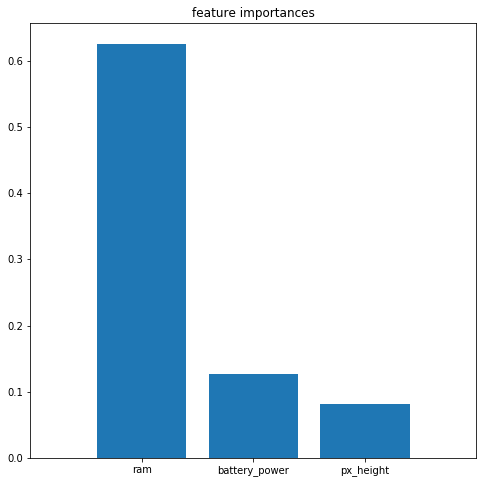

In [21]:
d_first = 3
plt.figure(figsize=(8, 8))
plt.title("feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=0)
plt.xlim([-1, d_first]);

### RandomForestClassifier

In [22]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100,random_state=11)
rf.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=11, verbose=0, warm_start=False)

In [23]:
y_pred_rf = rf.predict( features_test )
accuracy_score(y_pred_rf, labels_test)

0.8975

###  GridSearchCV 

In [24]:
forest_params = {'max_depth': range(1,11),'max_features': range(4,19)}
forest_grid = GridSearchCV(rf, forest_params, cv = 5, n_jobs = -1, verbose = True)
forest_grid.fit( features_train, labels_train )

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   56.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=11, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(4, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [25]:
forest_grid.best_params_, forest_grid.best_score_

({'max_depth': 9, 'max_features': 14}, 0.894375)

### Result

In [26]:
knn_grid.best_score_, knn_grid.best_params_

(0.9225, {'n_neighbors': 10})

Как ни странно, kNN с гиперпараметрами 

                {'n_neighbors': 10} 
                дал наилучший результат 0.9225 
                
для выбранного датасета. 